# Load the dataset and explore the variables.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
df=df.loc[:,('tenure','SeniorCitizen','MonthlyCharges','Churn')]
df

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


# Extract the target variable.

In [7]:
y=df['Churn']

# Extract the independent variables and scale them.

In [8]:
X=df.drop('Churn',axis=1)
X_num=X.select_dtypes(include=np.number)
scaler= RobustScaler()
scaler.fit(X_num)
X_num_scaled= pd.DataFrame(scaler.transform(X_num),columns=X_num.columns)
X_full=X_num_scaled

# Build the logistic regression model.

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_full,y,test_size=0.45,random_state=40)

# Evaluate the model.

In [10]:
classification= LogisticRegression(max_iter=500)
classification.fit(X_train,y_train)
y_test_pred=classification.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.7889589905362776

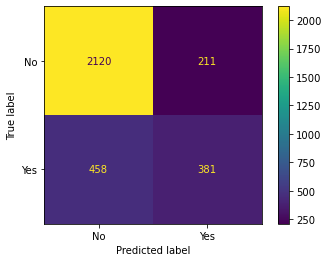

In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(classification,X_test, y_test)

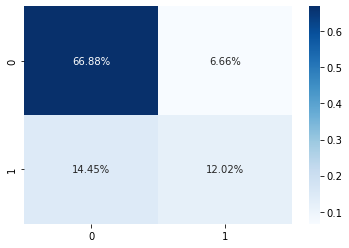

In [12]:
cmx=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%', cmap='Blues');

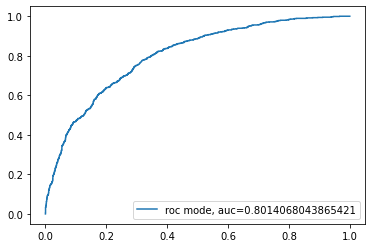

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_probs=classification.predict_proba(X_test)[::,1]

y_cat=pd.get_dummies(y, drop_first=True)

X_train,X_test,y_train,y_test=train_test_split(X_full,y_cat,test_size=0.45,random_state=40)

fpr,tpr, _ = roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
plt.plot(fpr,tpr,label='roc mode, auc='+str(auc))
plt.legend(loc=4)
plt.show();

# Even a simple model will give us more than 70% accuracy. Why?

- The model give us an accuracy almost of 79%, but if we don't apply the model, the result would be pretty much the same cause just evaluating the Real True values over the predicted True and Predicted false values of the confusion matrix it gives you a 73%. So, applying the logistic regression it gives you just an accuracy about 6% higher, so this means that even using a random values it would be an accuracy about the same percentatge. How many times we are right. Also data accuracy by itself is not enough.

# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [14]:
from imblearn.over_sampling import SMOTE 

smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_full,y)

X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.45,random_state=40)
classif_smote=SMOTE(random_state=40)
classif_smote.fit(X_train_smote,y_train_smote)
y_test_pred_smote=classification.predict(X_test_smote)
accuracy_score(y_test_smote,y_test_pred_smote)

0.6892849473910243

In [15]:
from imblearn.over_sampling import SMOTE

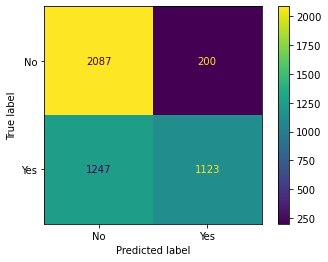

In [16]:
confusion_matrix(y_test_smote,y_test_pred_smote)
plot_confusion_matrix(classification,X_test_smote, y_test_smote)

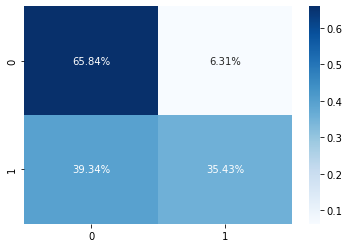

In [17]:
cmx_smote=confusion_matrix(y_test_smote,y_test_pred_smote)
sns.heatmap(cmx_smote/np.sum(cmx), annot=True, fmt='.2%', cmap='Blues');

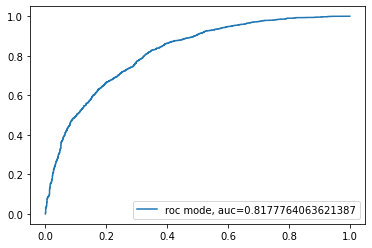

In [18]:
y_pred_probs=classification.predict_proba(X_test_smote)[::,1]

y_cat_smote=pd.get_dummies(y_smote, drop_first=True)

X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_cat_smote,test_size=0.45,random_state=40)

fpr,tpr, _ = roc_curve(y_test_smote,y_pred_probs)
auc=roc_auc_score(y_test_smote,y_pred_probs)
plt.plot(fpr,tpr,label='roc mode, auc='+str(auc))
plt.legend(loc=4)
plt.show();

# Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [19]:
from imblearn.under_sampling import TomekLinks 

tk=TomekLinks()
X_tk,y_tk=tk.fit_resample(X_full,y)

X_train_tk,X_test_tk,y_train_tk,y_test_tk=train_test_split(X_tk,y_tk,test_size=0.45,random_state=40)
classif_tk=TomekLinks()
classif_tk.fit(X_train_tk,y_train_tk)
y_test_pred_tk=classification.predict(X_test_tk)
accuracy_score(y_test_tk,y_test_pred_tk)

0.7904536222071767

In [24]:
y_tk.value_counts()

No     4694
Yes    1869
Name: Churn, dtype: int64

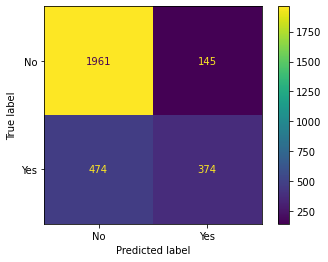

In [20]:
confusion_matrix(y_test_tk,y_test_pred_tk)
plot_confusion_matrix(classification,X_test_tk, y_test_tk)

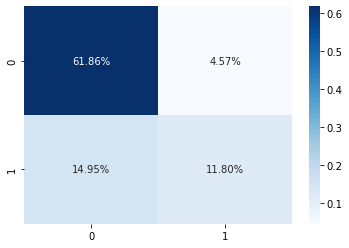

In [21]:
cmx_tk=confusion_matrix(y_test_tk,y_test_pred_tk)
sns.heatmap(cmx_tk/np.sum(cmx), annot=True, fmt='.2%', cmap='Blues');

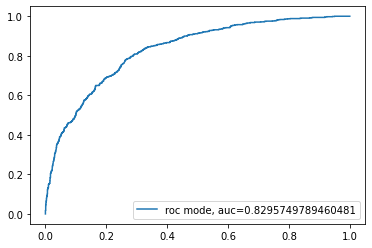

In [22]:
y_pred_probs=classification.predict_proba(X_test_tk)[::,1]

y_cat_tk=pd.get_dummies(y_tk, drop_first=True)

X_train_tk,X_test_tk,y_train_tk,y_test_tk=train_test_split(X_tk,y_cat_tk,test_size=0.45,random_state=40)

fpr,tpr, _ = roc_curve(y_test_tk,y_pred_probs)
auc=roc_auc_score(y_test_tk,y_pred_probs)
plt.plot(fpr,tpr,label='roc mode, auc='+str(auc))
plt.legend(loc=4)
plt.show();

- There is a minimal improvment about 0,1% compares with the Logistic Regression classification, after apply the TomekLinks undersampling algorithm. This model identify pairs of nearest neighbors in a dataset that have different classes.